In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.agg(["var","median","skew","kurtosis"])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
var,7.975626,235.147243,783.218239,44.227343,21719.813935,560.584436,262.449618,6.867168
median,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
skew,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [7]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


#### Converting Sales into categorical data as per the problem statement

In [8]:
data["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [9]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [10]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

Medium    243
Low       130
High       27
Name: Sales, dtype: int64


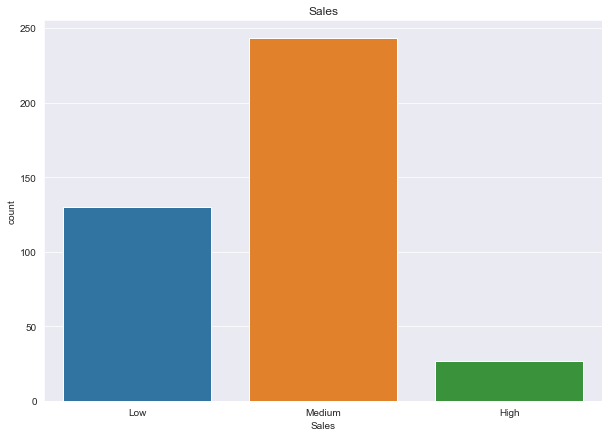

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


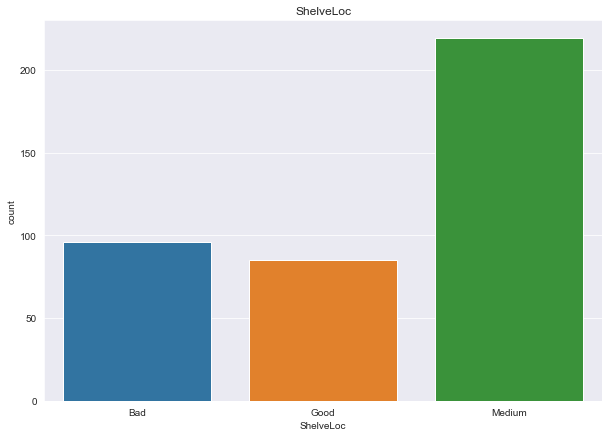

Yes    282
No     118
Name: Urban, dtype: int64


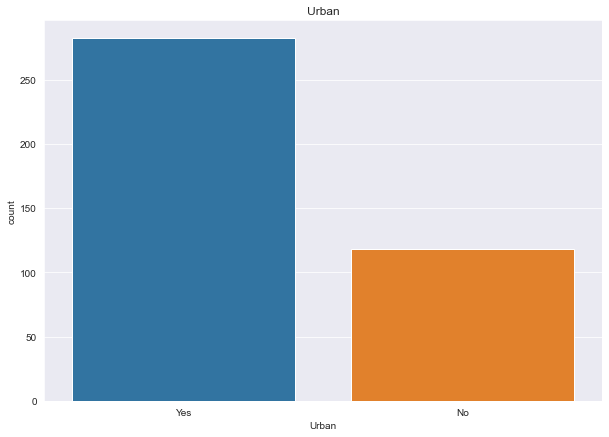

Yes    258
No     142
Name: US, dtype: int64


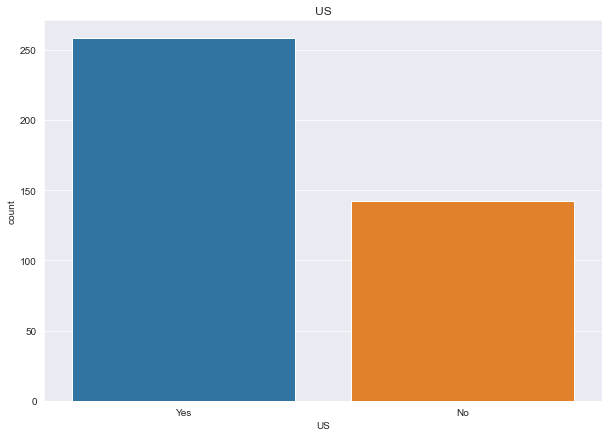

In [11]:
#Countplot for categorical data
obj = data[["Sales","ShelveLoc","Urban","US"]]

for i in obj:
    sns.set_style("darkgrid")
    plt.figure(figsize = (10,7))
    sns.countplot(data[i])
    counts = obj[i].value_counts()
    print(counts)
    plt.title(i)
    plt.show()

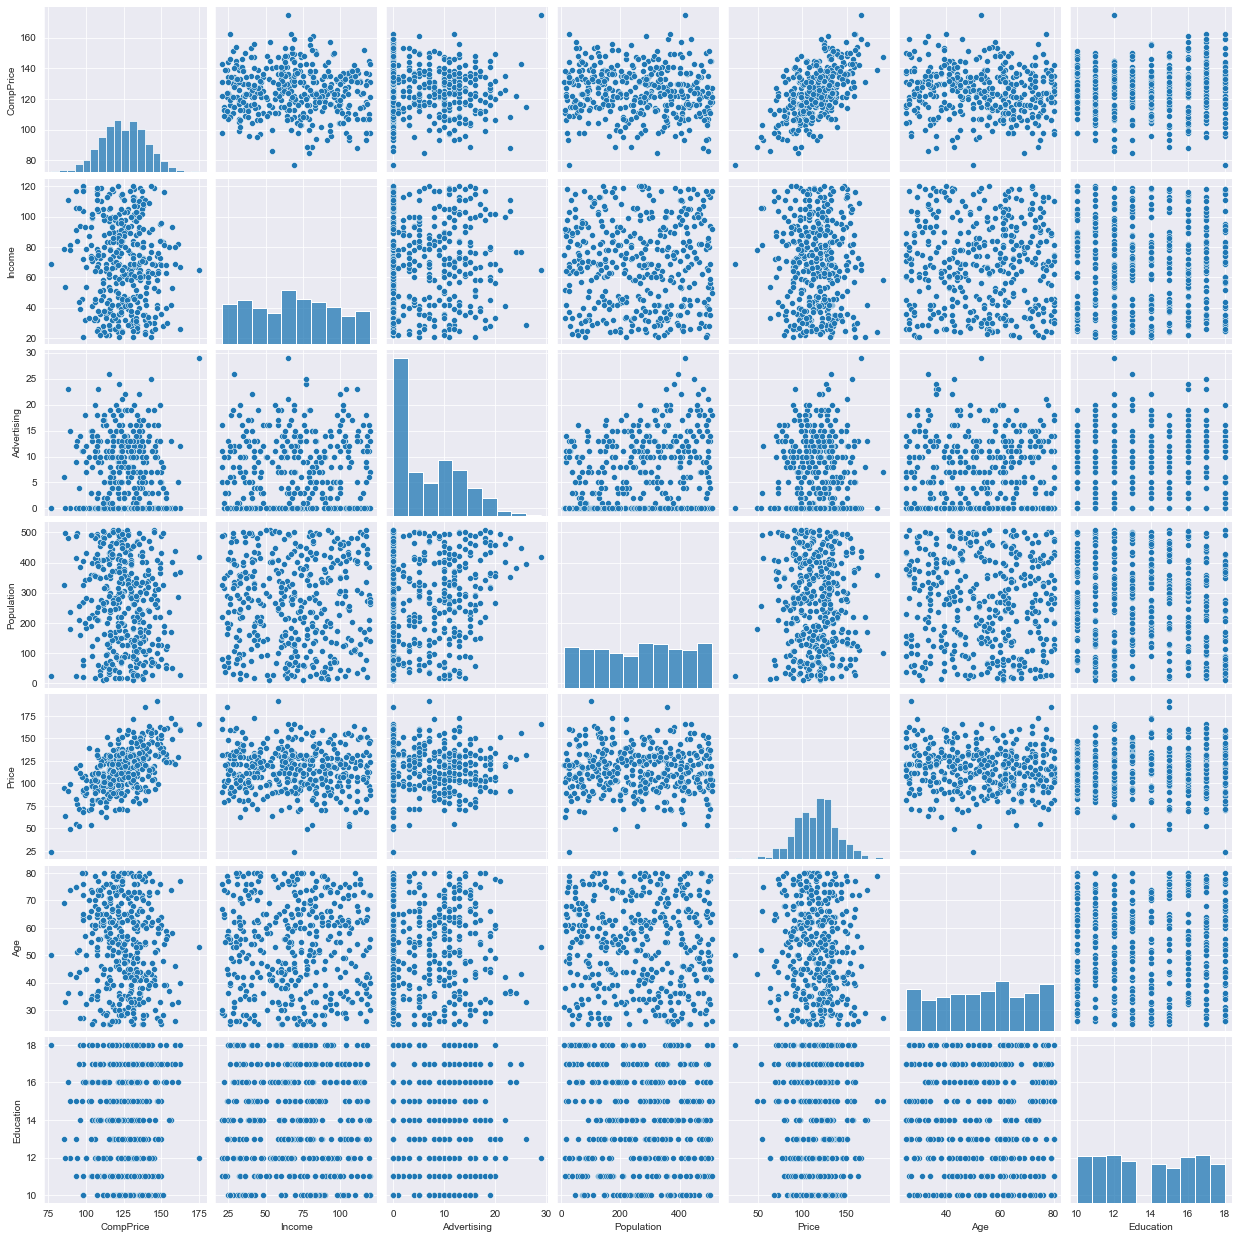

In [12]:
sns.pairplot(data)

## Data Preparing

In [13]:
#Encoding categorical data
le = preprocessing.LabelEncoder()

data["Sales"] = le.fit_transform(data["Sales"])
data["ShelveLoc"] = le.fit_transform(data["ShelveLoc"])
data["Urban"] =  le.fit_transform(data["Urban"])
data["US"] =  le.fit_transform(data["US"])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [14]:
X = data.iloc[:,1:]
y = data.iloc[:,:1]

In [15]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [16]:
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

(280, 10) (280, 1) (120, 10) (120, 1)


## Random Forests Model

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=42)

### Grid Search CV

In [18]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = model,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10}
0.7425


As per the Grid Search CV results criterion should be "gini" and max_depth should be "10" for better model performance.

### Creating new model as per the output of Grid Search CV

In [19]:
new_model = RandomForestClassifier(criterion = "gini", max_depth = 10)
new_model.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=10)

In [20]:
#prediction train data
pred_train_y = new_model.predict(Xtrain)
pred_train_y

array([2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1])

In [21]:
#prediction test data
pred_test_y = new_model.predict(Xtest)
pred_test_y

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [22]:
pd.Series(pred_test_y).value_counts()

2    95
1    25
dtype: int64

In [23]:
#accuracy for train data
accuracy_score(ytrain,pred_train_y)    

1.0

In [24]:
#confusion matric of train data
confusion_matrix(ytrain,pred_train_y)

array([[ 15,   0,   0],
       [  0,  96,   0],
       [  0,   0, 169]], dtype=int64)

In [25]:
#classification report for train data
classification_report(ytrain,pred_train_y)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00        96\n           2       1.00      1.00      1.00       169\n\n    accuracy                           1.00       280\n   macro avg       1.00      1.00      1.00       280\nweighted avg       1.00      1.00      1.00       280\n'

In [26]:
#accuracy for test data
accuracy_score(ytest,pred_test_y)    

0.7083333333333334

In [27]:
#confusion matrix for test data
confusion_matrix(ytest,pred_test_y)

array([[ 0,  0, 12],
       [ 0, 18, 16],
       [ 0,  7, 67]], dtype=int64)

In [28]:
#classification report for test data
classification_report(ytest,pred_test_y)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        12\n           1       0.72      0.53      0.61        34\n           2       0.71      0.91      0.79        74\n\n    accuracy                           0.71       120\n   macro avg       0.48      0.48      0.47       120\nweighted avg       0.64      0.71      0.66       120\n'